In [1]:
!conda install "notebook>=5.3" "ipywidgets>=7.2"
!conda install nbformat==4.4.0
!pip install plotly==4.6.0
!pip install chart-studio==1.0.0
!conda install nbconvert

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# **Data Spaces - Analysis of the Online Shoppers Purchasing Intention Dataset**
**Martina Alutto, s265027**



# Introduction

The analysis that will be presented has been carried out on the dataset available online at the following link: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset.

This dataset consists of feature vectors belonging to 12,330 online sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user
profile, or period. Some of these sessions on the site end with a purchase, while others do not.
The dataset contains 18 features, where 10 are numerical and 8 are categorical attributes, there is also the 'Revenue' attribute, that indicates whether the session ends with shopping or not and this could be used as the class label.

The columns containing users’s attributes are described in the following:


*  "Administrative", "Administrative_Duration", "Informational", "Informational _Duration", "ProductRelated" and "ProductRelated_Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
*  "BounceRates" for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
*  "ExitRates" for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
*  "PageValues" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The previous three features represent the metrics measured by *Google Analytics* for each page in the e-commerce site. 
*   "SpecialDay" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
*   "Month" indicates the month in which the session took place.
*   "OperatingSystems" and "Browser" are features indicating which operating system and browser are used by categorical values.
*   "Region" indicates the geographic region of the user. 
*   "TrafficType" is a particular identifier type for any hierarchy of customer base: *user* or *account* are two of the most commonly defined traffic types. (In the dataset this is a categorical feature).
*   "VisitorType" states the nature of the user as returning or new visitor.
*   "Weekend" features indicates whether the session's date is weekend or not.

As mentioned earlier, the boolean attribute "Revenue" is used to understand if the session in question ends with a purchase (and was therefore successful) or if instead it was limited to a search or a quick look at the products. The analysis of the users' behaviour could be very useful to predict it and to provide a better organisation of the site (e.g. a restyiling with more pop-ups that encourage purchase by users or more offers) in order to avoid leaving the site without shopping.

The analysis carried out consists of a supervised classification problem, using the Python language and Jupyter Notebook. 

Among the main packages imported for the purposes of our analysis are to be reported: 
-  *pandas*: an open-source library prviding high-performance data structures and data analysis tools for manipulating numerical tables and time series.
-  *numpy*: the fundamental package for scientific computing with Python.
NumPy provides among other things: a powerful N-dimensional array object, sophisticated (broadcasting) functions, useful linear algebra and random number capabilities.
-  *sklearn*: a free machine learning library providing tools for data mining.It features various algorithms like support vector machine, random forests, and k-neighbours.
-  *matplotlib*: a comprehensive library for creating static, animated, and interactive visualizations.
-  *seaborn*: a Python data visualization library based on *matplotlib*, providing an interface for statistical graphics.

In [12]:
# TESINA DATA SPACES

# Import libraries
import csv

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sklearn
from sklearn import decomposition, preprocessing
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 

from IPython.display import Image  

import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # to show plots in notebook


# online plotly
import chart_studio
from chart_studio import plotly
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
chart_studio.tools.set_credentials_file(username='martinaalutto', api_key='E99v9jtQ5PAAKwnMXzzf')

# offline plotly
#from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

# set the seed for the analysis
SEED = 40

# pandas option for the output style 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
pd.set_option('expand_frame_repr', True)

**Exploration and Preprocessing**

After importing the dataset, we can move on to exploring it, we can take a look of teh structure of our data, checking whether missing values are present in the dataset or not.

In [4]:
# Load data
data = pd.read_csv('/Users/Martina/Google Drive/online_shoppers_intention.csv') 

print('\nDataset dimensions : ', data.shape)

# Data analysis
# Preview the first 5 lines of the loaded data 
print('This is a preview of the first 5 lines of the loaded dataset.\n')
print(data.head(5))

#with open('/content/drive/My Drive/Colab Notebooks/Data Spaces/online_shoppers_intention.csv', newline='') as csvfile:
#   lettore = csv.reader(csvfile, delimiter=",")
#   header = next(lettore)
#   print('\nFeatures : ', header)

# check for null values in the dataset
print("\nThere are " + ("some" if data.isnull().values.any() else "no")  + " null/missing values in the dataset.")


Dataset dimensions :  (12330, 18)
This is a preview of the first 5 lines of the loaded dataset.

   Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  Weekend  Revenue
0  0               0.0                      0              0.0                     1               0.000000                 0.20         0.20       0.0         0.0         Feb   1                 1        1       1            Returning_Visitor  False    False  
1  0               0.0                      0              0.0                     2               64.000000                0.00         0.10       0.0         0.0         Feb   2                 2        1       2            Returning_Visitor  False    False  
2  0               0.0                      0              0.0                     1               0.000000         

In order to investigate the pair-wise correlations between two variables X and Y, we use the Pearson correlation. 
Let σ(X), σ(Y) be the standard deviation of X,Y and the covariance cov(X,Y) = E[(X−E[X])(Y−E[Y])]. 
Then we can define the Pearson correlation as ρ_{X,Y}=cov(X,Y)σ(X)σ(Y).

Correlation matrix between the dataset features.


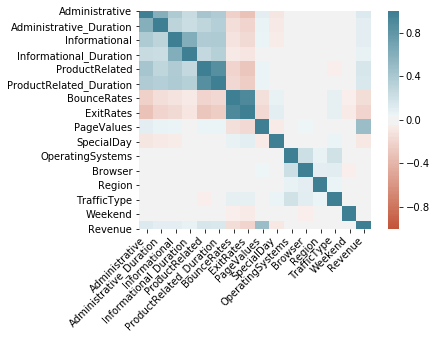

In [5]:
# Correlation matrix
print('Correlation matrix between the dataset features.')
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

The correlation matrix graph shows a strong positive correlation between the attributes "BounceRates" and "ExitRates". Let us remember that Bounce rate is the percentage of people who landed on a page and immediately left, so they are always one-page sessions. A high Bounce rate on a home page is usually a sign that something is wrong, but it’s really a matter of context. Instead Exit rate is the percentage of people who left your site from that page and exits may have viewed more than one page in a session. That means they may not have landed on that page, but simply found their way to it through site navigation. What is important is that like Bounce rates, high Exit rates can often reveal problem areas on your site and that's why we have a strong correlation between them. 

It's also clear that the attributes "Administrative", "Informational" and "ProductRelated" are quite positively correlated with their duration attributes, because the number of pages of a certain type visited during the session is related to the time spent on that type of pages. You can see a greater correlation in the case of product pages because, with the same number of pages of the 3 types, more time is spent on a product page where all its specifications and characteristics are looked at.

We can also observe a quite high positive correlation between the "PageValues" feature and the label "Revenue", and this is what we expected because the objective of the first value is to give an idea of the page that has contributed most to the site's revenue. If a page has not been involved in any way in the e-commerce transaction, its Page Value is € 0, since the page has never been visited in a session where a transaction was made.
-- **vedere se aggiungere altro** -- 

We can observe how the categorical attributes "Month", "VisitorType" and "Weekend" have string values but they can be easily transformed into numbers.
"Weekend" is transformed by placing *0* if it was *False* and *1* if it was *True*; similarly "VisitorType" is set to *1* if it was a returning visitor and *0* if it is a new one. 
Instead "Month" could be transformed using LabelEncoder which automatically converts each distinct label into an unique integer. However, we must note that there are no user sessions in January and April, so we transform this attribute by hand in order to avoid future problems of decoding and understanding our results. That way we'll have an encoding of months one through 12. 

In [6]:
# Label Encoding
data['Weekend'] = data['Weekend'].apply(lambda x: 0 if x=='False' else 1)
data['VisitorType'] = data['VisitorType'].apply(lambda x: 0 if x=='New_Visitor' else 1)

for i in range(len(data)):
        if data['Month'][i] == 'Jan':
            data.at[i, 'Month'] = 1
        if data['Month'][i] == 'Feb':
            data.at[i, 'Month'] = 2
        if data['Month'][i] == 'Mar':
            data.at[i, 'Month'] = 3
        if data['Month'][i] == 'Apr':
            data.at[i, 'Month'] = 4
        if data['Month'][i] == 'May':
            data.at[i, 'Month'] = 5
        if data['Month'][i] == 'June':
            data.at[i, 'Month'] = 6
        if data['Month'][i] == 'Jul':
            data.at[i, 'Month'] = 7
        if data['Month'][i] == 'Aug':
            data.at[i, 'Month'] = 8
        if data['Month'][i] == 'Sep':
            data.at[i, 'Month'] = 9
        if data['Month'][i] == 'Oct':
            data.at[i, 'Month'] = 10
        if data['Month'][i] == 'Nov':
            data.at[i, 'Month'] = 11
        if data['Month'][i] == 'Dec':
            data.at[i, 'Month'] = 12

print('This is a preview of the first 5 lines of the loaded dataset with the transformed attributes.\n')
print(data.head(5))

This is a preview of the first 5 lines of the loaded dataset with the transformed attributes.

   Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  Browser  Region  TrafficType  VisitorType  Weekend  Revenue
0  0               0.0                      0              0.0                     1               0.000000                 0.20         0.20       0.0         0.0         2     1                 1        1       1            1            1        False  
1  0               0.0                      0              0.0                     2               64.000000                0.00         0.10       0.0         0.0         2     2                 2        1       2            1            1        False  
2  0               0.0                      0              0.0                     1               0.000000                 0.20         

In [7]:
print('The following statistical measures can give us a statistical overview of the data.\n')
print(data.describe())

The following statistical measures can give us a statistical overview of the data.

       Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration   BounceRates     ExitRates    PageValues    SpecialDay  OperatingSystems       Browser        Region   TrafficType   VisitorType  Weekend
count  12330.000000    12330.000000             12330.000000   12330.000000            12330.000000    12330.000000             12330.000000  12330.000000  12330.000000  12330.000000  12330.000000      12330.000000  12330.000000  12330.000000  12330.000000  12330.0
mean   2.315166        80.818611                0.503569       34.472398               31.731468       1194.746220              0.022191      0.043073      5.889258      0.061427      2.124006          2.357097      3.147364      4.069586      0.862612      1.0    
std    3.321784        176.779107               1.270156       140.749294              44.475503       1913.669288    

In order to better understand this data, let us move on to a more in-depth exploration, but we can already see that the all users are 'Returning' and the dataset includes only weekend sessions; these could be limitations in terms of a deeper analysis of this kind of data but we will make a general predictive analysis, a supervised classification problem.

In [8]:
revenue_dict = {False: "No Revenue", True: "Revenue"}
y = data["Revenue"].value_counts()

d = [go.Bar(x=[revenue_dict[x] for x in y.index], y=y.values, marker=dict(color=['#FF3333','#3399FF']))]
layout = go.Layout(
    title='Revenue distribution over the total',
    autosize=False,
    width=400,
    height=400,
    yaxis=dict(
        title='Number of samples',
    ),
)
fig = go.Figure(data=d, layout=layout)
fig.show()
#iplot(fig, filename='basic-bar3')

revenue_percentage = data["Revenue"].sum() * 100 / data["Revenue"].shape[0]
print("The Revenue percentage is %.3f%%." % revenue_percentage)

The Revenue percentage is 15.474%.


In [9]:
month_revenue = data.groupby(["Month", "Revenue"]).size().unstack()
trace1 = go.Bar(
    x=month_revenue.index,
    y=month_revenue[0],
    name='No Revenue',
    marker = dict(color = '#FF3333')
)
trace2 = go.Bar(
    x=month_revenue.index,
    y=month_revenue[1],
    name='Revenue',
    marker = dict(color = '#3399FF')
)
d2 = [trace1, trace2]
layout = go.Layout(
    title='Revenue Distribution for Month',
    autosize=True,
    barmode='stack',
    margin=go.layout.Margin(l=50, r=50),
    xaxis=dict(title='Month',),
    yaxis=dict(title='Number of samples',automargin=True,),
    legend=dict(x=0, y=1, ),
)
fig = go.Figure(data=d2, layout=layout)
fig.show()

#revenue_percentage = data["Revenue"].sum() * 100 / data["Revenue"].shape[0]
#print("The Revenue percentage is %.3f%%." % revenue_percentage)

As noted above, there are no sessions during the months of January and April, while we can see strong traffic during the months of May (a total of 3364 sessions, with about 10% of purchases) and November (a total of 2998 sessions and about 25% of purchases).
These data can reflect a higher online traffic due to the arrival of summer (in the case of May) and especially in view of Christmas (as far as November is concerned) where we can also notice a higher percentage of purchases, accompanied by a fairly high figure also in December. We have always to take into account the shipping time required for each online order, so the peak of purchases will obviously not be on the 24th or the 25th of December but between mid-November and early December. 

In [ ]:
import plotly.express as px
revenue = data[data['Revenue'] == 1]
no_revenue =  data[data['Revenue'] == 0]

def create_revenue_trace(col, visible=False):
    return go.Histogram(
        x=revenue[col],
        name='revenue',
        marker = dict(color = '#3399FF'),
        visible=visible,
    )

def create_no_revenue_trace(col, visible=False):
    return go.Histogram(
        x=no_revenue[col],
        name='no revenue',
        marker = dict(color = '#FF3333'),
        visible = visible,
    )

features_for_hist = ['BounceRates', 'ExitRates', 'PageValues', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']
active_idx = 0
traces_revenue = [(create_revenue_trace(col) if i != active_idx else create_revenue_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_no_revenue = [(create_no_revenue_trace(col) if i != active_idx else create_no_revenue_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
d = traces_revenue + traces_no_revenue

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(d)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
)

fig =  go.Figure(data=d, layout=layout)
fig.show()

In [ ]:
def create_box_revenue_trace(col, visible=False):
    return go.Box(
        y=revenue[col],
        name='Revenue',
        marker = dict(color = '#3399FF'),
        visible=visible,
    )

def create_box_no_revenue_trace(col, visible=False):
    return go.Box(
        y=no_revenue[col],
        name='No Revenue',
        marker = dict(color = '#FF3333'),
        visible = visible,
    )

# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(revenue[col].unique())>5]

active_idx = 0
box_traces_revenue = [(create_box_revenue_trace(col) if i != active_idx else create_box_revenue_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
box_traces_no_revenue = [(create_box_no_revenue_trace(col) if i != active_idx else create_box_no_revenue_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
d = box_traces_revenue + box_traces_no_revenue

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(d)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = go.Figure(data=d, layout=layout)
fig.show()

In [ ]:
data[['PageValues', 'Revenue']].groupby(['Revenue'], as_index=False).mean()

Calculating the average of the attribute "PagesValues" for both sessions ended with purchase and sessions ended without purchase, we can see that the former is much higher than the latter. This confirms the quite good correlation that we noticed previously between the attributes "PagesValues" and "Revenue".


Now we can save the attribute "Revenue" as label and exlude it from the dataset.

In [ ]:
# Save attribute label and delete it from the dataset
label = data['Revenue'][:]
X = np.array(data.drop(['Revenue'], 1))

In order to reduce the dimensionality of our dataset, we could apply the PCA (Principal Component Analysis), i.e. a technique for deriving a low-dimensional set of features from a large set of variables. Given data points in a large space, it projects them into a lower dimensional space while preserving as much information as possible and maximizing the variance of the projected data. The chosen projection is the one that minimizes mean squared distance between data point and projections. The new space's principal component corrensponds to the points in the direction of the largest variance; each sbusequent principal component is orthogonal to the previous ones and it corresponds to points in the directions of the largest variance of the residual subspace. 

Given a set of data points, if we compute the covariance matrix E, the PCA basis vectors are the eigenvectors of E, therefore the larger eigenvalue corresponds to the more important eigenvectors. 

As it is a required condition for PCA analysis, we firstly have to standardize data, by subtracting the mean and scaling to unit variance with the *StandardScaler* of the sklearn library.

Once have scaled data, we can perform the PCA and the amount of explained variance by each component and the cumulative explained variance in order to can choose in order to choose the most appropriate number of components for our analysis.

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

pca = PCA(random_state=SEED)
data_pca = pca.fit_transform(data_scaled)

tot = sum(pca.explained_variance_) # total explained variance of all principal components
var_exp = [(i / tot) * 100 for i in sorted(pca.explained_variance_, reverse=True)] # individual explained variance
cum_var_exp = np.cumsum(var_exp) # cumulative explained variance

trace_cum_var_exp = go.Bar(
    x=list(range(1, len(cum_var_exp) + 1)), 
    y=var_exp,
    marker = dict(color = '#00CCCC'),
    name="individual explained variance",
)
trace_ind_var_exp = go.Bar(
    x=list(range(1, len(cum_var_exp) + 1)),
    y=cum_var_exp,
    marker = dict(color = '#FF9999'),
    name="cumulative explained variance",
)
d = [trace_cum_var_exp, trace_ind_var_exp]
layout = go.Layout(
    title='Individual and Cumulative Explained Variance',
    autosize=True,
    yaxis=dict(
        title='percentage of explained variance',
    ),
    xaxis=dict(
        title="principal components",
        dtick=1,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=d, layout=layout)
fig.show()

We can see from the graph that the first four components explain about half of the total variance, instead the last three components explain near no variance. 
Covering more than 84% of the total variance explained, we can choose a PCA with 10 components. 

From now on, we will carry out two types of analysis, the first taking into account the dimensional reduction implemented by the PCA and the second where the classifiers will be used directly on the original data space.

In [ ]:
n_components = 10
pca = PCA(n_components, random_state=SEED)
data_pca = pca.fit_transform(data_scaled)

principal_X = pd.DataFrame(data = data_pca, columns = ["Principal component%d" % (x + 1) for x in range(n_components)])
final_X = pd.concat([principal_X, label], axis = 1)

We now can move on the random split of data into train and test sets in proportion 7:3. To do this, we can use the function train_test_split of the library scikit-learn, by setting
the parameter random_state in order to fix the seed of the random number generator.
This function splits the data into two sets by a given proportion that will be used for our classification problem.

In [ ]:
X_train, X_test, target_train, target_test = train_test_split(X, label, test_size=0.3, train_size=0.7, random_state = SEED)
X_train_pca, X_test_pca, target_train_pca, target_test_pca = train_test_split(principal_X, label, test_size=0.3, train_size=0.7, random_state = SEED)

# **Classification**

**K Nearest Neighbours**

Having divided data into three random subsets, we’ll proceed with the K-Nearest Neighbors classification by using the sklearn library’s KNeighborsClassifier.

The K-Nearest Neighbors classifier computes the distance of each training record to others, it identifies k nearest neighbors and it uses class labels of nearest neighbors to determine the class label of the unknown record.
The parameter *n_neighbors* of the KNeighborsClassifier corresponds to K, the number of nearest neighbors considered for the prediction; instead the parameter *weights* can be *uniform*, then all neighbors have the same weight for the voting or *distance*, then the votes of the neighbors are weighted by the inverse of the distance for the voting.

Let us perform this classifier on the full dataset.

In [ ]:
#KNN
max_accuracy = 0
max_neigh = 0
max_weight = ''
#Create KNN Classifier
for k in [1, 5, 10, 15, 20, 30, 40, 50]:
    for weights in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)

        #Train the model using the training sets
        knn.fit(X_train, target_train)

        #Predict the response for test dataset
        y_pred = knn.predict(X_test)

        if (max_accuracy <= metrics.accuracy_score(target_test_pca, y_pred)):
            max_accuracy = metrics.accuracy_score(target_test_pca, y_pred)
            max_neigh = k
            max_weight = weights
        
# Model Accuracy, how often is the classifier correct?
print("Best Accuracy for KNN on the full dataset with k =",max_neigh,"and",max_weight,"weights :",max_accuracy)

If we perform the KNeighborsClassifier on the dataset reduced by considering the first ten principal components of the PCA, this will be the results.

In [ ]:
max_accuracy = 0
max_neigh = 0
max_weight = ''
for k in [1, 5, 10, 15, 20, 30, 40, 50]:
    for weights in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)

        #Train the model using the training sets
        knn.fit(X_train_pca, target_train_pca)
        #Predict the response for test dataset
        y_pred_pca = knn.predict(X_test_pca)
        
        if (max_accuracy <= metrics.accuracy_score(target_test_pca, y_pred_pca)):
            max_accuracy = metrics.accuracy_score(target_test_pca, y_pred_pca)
            max_neigh = k
            max_weight = weights
        
# Model Accuracy, how often is the classifier correct?
print("Best Accuracy for KNN on the reduced dataset with k =",max_neigh,"and",max_weight,"weights :",max_accuracy)

In this case, the best value for the accuracy is k = 15 with uniform weights and the accuracy value of 87.4% is greater than the one obtained performing the classifier on the full dataset.

**Decision Tree**

With the classification tree we predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs. In interpreting the results of a classification tree, we are often interested not only in the class prediction corresponding to a particular terminal node region, but also in the class proportions among the training observations that fall into that region.

The classification error rate is simply the fraction of the training observations in that region that do not belong to the most common class. 
However can define the *Gini* index by $$G = \sum_{k=1}^{2} p_{mk}(1-p_{mk})$$ a measure of total variance across the two classes.
The $p_{mk}$ represents the proportion of training observations in the m-th region that are from the k-th class. The Gini index is small if all of the $p_{mk}$'s are close to 0 or 1, namely that a node contains predominantly observations from a single class.
An alternative to the *Gini* index is *cross-entropy*, given by
$$D = -\sum_{k=1}^{2} p_{mk}log(p_{mk})$$. This index will take on a value near zero if the $p_{mk}$ are all near 0 or near 1. When building a classification tree, either the *Gini* index or the *cross-entropy* are typically used to evaluate the quality of a particular split, since these two approaches are more sensitive to node purity than is the classification error rate.

We firstly perform the classifier on the full dataset.

In [ ]:
# DECISION TREE
max_accuracy = 0
max_dep = 0
max_crit = ''
max_samp = 0
for depth in [3, 10, 25, 40, 65]:
    for crit in ['gini', 'entropy']:
        for samples in [2, 5, 10, 15]:
            
            clf = tree.DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_split=samples)
            clf = clf.fit(X_train, target_train)

            y_pred = clf.predict(X_test)
            if (max_accuracy<= metrics.accuracy_score(target_test, y_pred)):
                max_accuracy = metrics.accuracy_score(target_test, y_pred)
                max_dep = depth
                max_crit = crit
                max_samp = samples

print("Best Accuracy for DecisionTree on the full dataset\nwith criterion of",max_crit,",min_samples_split =",max_samp,",max_depth =",max_dep,":",max_accuracy)

In [ ]:
feature_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

dot_data = StringIO()
export_graphviz(tree.DecisionTreeClassifier(criterion=max_crit, max_depth=max_dep, min_samples_split=max_samp).fit(X_train, target_train), out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['True','False'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('revenues_depth3.png')
Image(graph.create_png())

In [ ]:
max_accuracy = 0
max_dep = 0
max_crit = ''
max_samp = 0
for depth in [3, 10, 25, 40, 65]:
    for crit in ['gini', 'entropy']:
        for samples in [2, 5, 10, 15]:
            
            clf = tree.DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_split=samples)
            clf = clf.fit(X_train_pca, target_train_pca)

            y_pred_pca = clf.predict(X_test_pca)
            if (max_accuracy<= metrics.accuracy_score(target_test_pca, y_pred_pca)):
                max_accuracy = metrics.accuracy_score(target_test_pca, y_pred_pca)
                max_dep = depth
                max_crit = crit
                max_samp = samples

print("Best Accuracy for DecisionTree on the reduced dataset\nwith criterion of",max_crit,",min_samples_split =",max_samp,",max_depth =",max_dep,":",max_accuracy)

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['True','False'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('revenues_depth5.png')
Image(graph.create_png())

In [ ]:
X_train, X_test, target_train, target_test = train_test_split(X, label, test_size=0.5, train_size=0.5, random_state = 0)

clf_svm = svm.SVC(kernel = 'linear', gamma='auto')
clf_svm.fit(X_train, target_train)

y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))

In [ ]:
accuracy = np.zeros((7,2))
i = 0
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
  j = 0
  for ker in ['linear', 'rbf']:
    # Create an instance of SVC Classifier with linear kernel and fit the data.
    clf_svm = svm.SVC(C = c, kernel = ker, gamma='auto')
    clf_svm.fit(X_train, target_train)

    y_pred = clf_svm.predict(X_test)
    accuracy[i,j] = metrics.accuracy_score(target_test, y_pred)
    j += 1
  i += 1
  
print(accuracy)
print(accuracy.max())

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')